# Class 1: Course Intro + Getting Started with Matplotlib

Data Visualization - DSI Certificate  
Covers slides 01 (intro) and 02 (matplotlib basics)

## Notes from the intro

We talked about why data visualization matters using some historical examples. John Snow's cholera map is a classic one -- he plotted deaths on a map and traced them back to a water pump, which was a pretty big deal for public health. Florence Nightingale's coxcomb chart showed causes of death among soldiers and helped push for better sanitary conditions. The takeaway is that even back then, visualizing data was a powerful way to make a case for change.

We also looked at the Challenger disaster as a case study in what can go wrong when data isn't communicated well. Engineers had concerns about the O-rings in cold weather but the way the data was presented didn't make the danger obvious enough.

Three qualities of good data viz came up:
- **Aesthetic**: does it look good?
- **Substantive**: is the data honest and accurate?
- **Perceptual**: can the viewer understand the message?

## Matplotlib basics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

# make some sample data to work with
np.random.seed(613)
x = np.arange(50)
y = np.random.randint(0, 100, 50)

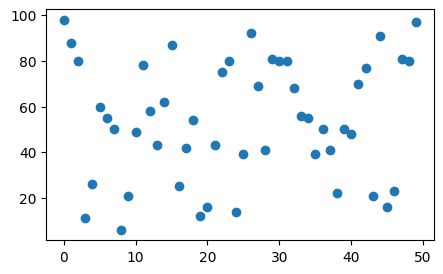

In [2]:
# basic scatterplot
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x, y)
plt.show()

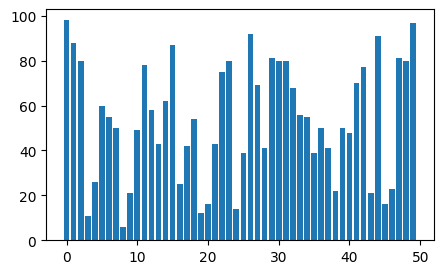

In [3]:
# bar chart with the same data
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(x, y)
plt.show()

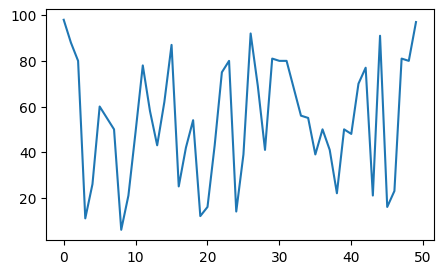

In [4]:
# line plot
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, y)
plt.show()

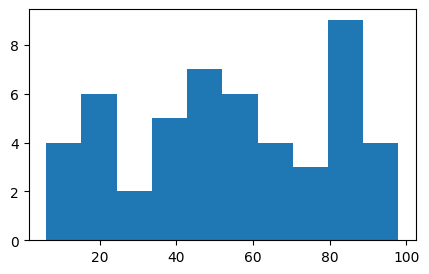

In [5]:
# activity: make a histogram
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(y)
plt.show()

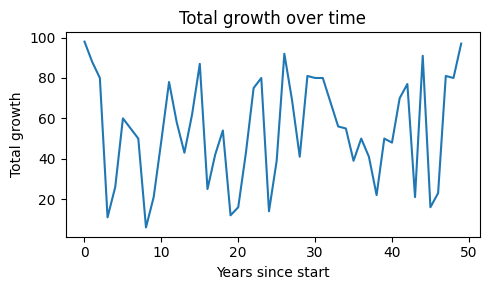

In [6]:
# adding labels and a title to our line plot
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, y)
ax.set_title('Total growth over time')
ax.set_ylabel('Total growth')
ax.set_xlabel('Years since start')
fig.tight_layout()
plt.show()

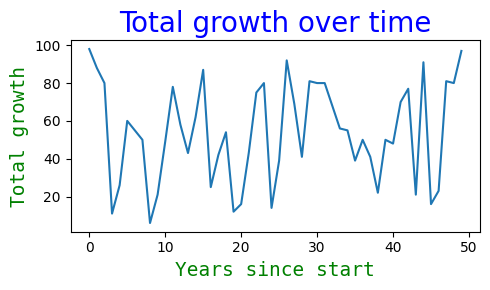

In [7]:
# using font dictionaries to style our labels
font1 = {'family': 'sans-serif', 'color': 'blue', 'size': 20}
font2 = {'family': 'monospace', 'color': 'green', 'size': 14}

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, y)
ax.set_title('Total growth over time', fontdict=font1)
ax.set_ylabel('Total growth', fontdict=font2)
ax.set_xlabel('Years since start', fontdict=font2)
fig.tight_layout()
plt.show()

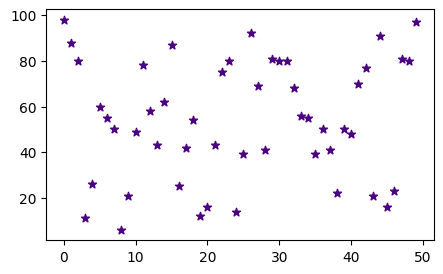

In [8]:
# customizing data points on a scatterplot
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x, y, marker='*', color='indigo')
plt.show()

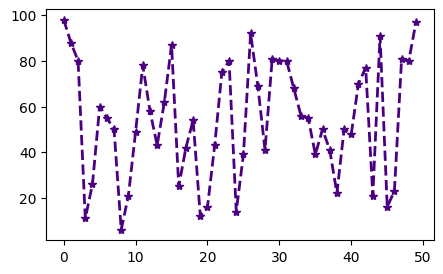

In [9]:
# line plot with custom line style and width
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, y, marker='*', color='indigo', linestyle='--', linewidth=2)
plt.show()

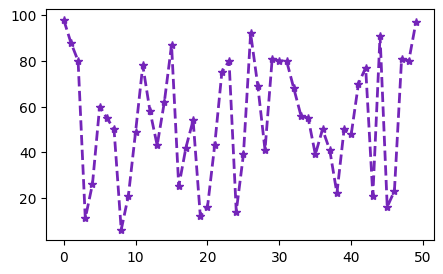

In [10]:
# using hex codes for colour
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, y, marker='*', color='#7425b9', linestyle='--', linewidth=2)
plt.show()

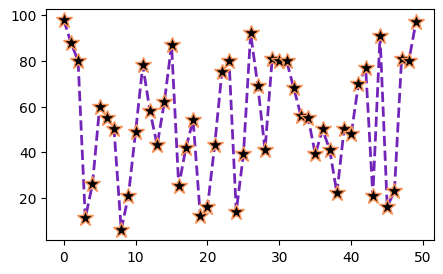

In [11]:
# going further with marker customization
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, y, marker='*',
        markersize=12,
        color='#7425b9',
        linestyle='--',
        linewidth=2,
        markeredgecolor='#fa9359',
        markerfacecolor='#000000')
plt.show()

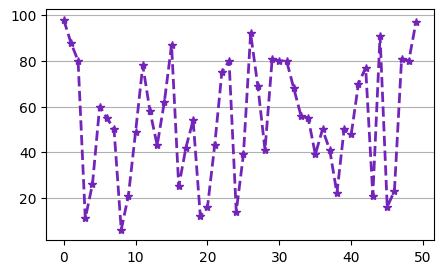

In [12]:
# adding grid lines
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, y, marker='*', color='#7425b9', linestyle='--', linewidth=2)
ax.grid(axis='y')
plt.show()

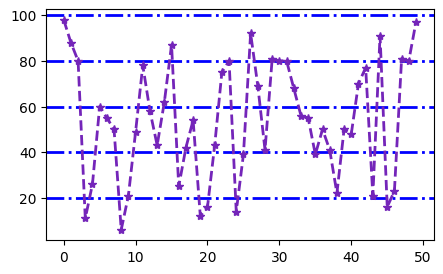

In [13]:
# customizing grid lines
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, y, marker='*', color='#7425b9', linestyle='--', linewidth=2)
ax.grid(axis='y', color='blue', linewidth=2, linestyle='-.')
plt.show()

## Activity: Exploring matplotlib

We visited the Python Graph Gallery (python-graph-gallery.com) and picked a visualization to try replicating. I thought the heatmap section was interesting since it handles a lot of the aesthetic and perceptual stuff automatically. The gallery is a solid resource to come back to when choosing chart types.

I decided to create a 2D density chart since it combines the aesthetic and perceptual principles we discussed -- showing the combined distribution of two quantitative variables in a visually intuitive way.

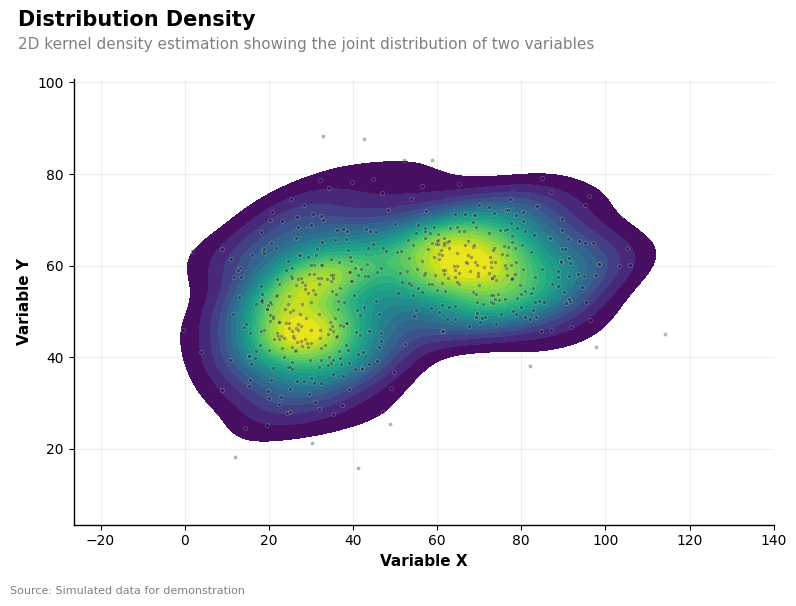

In [14]:
# 2D Density Chart - using my preferred style from assignment 3
# Style: white canvas, viridis colormap, bold labels, title/subtitle at top-left

import seaborn as sns

# set up my style
plt.style.use("default")
plt.rcParams.update({
    "figure.facecolor": "#FFFFFF",
    "axes.facecolor": "#FFFFFF",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.edgecolor": "#000000",
    "axes.linewidth": 1.0,
    "axes.grid": True,
    "grid.color": "#E0E0E0",
    "grid.linestyle": "-",
    "grid.linewidth": 0.75,
    "grid.alpha": 0.5,
    "axes.axisbelow": True,
    "font.family": "sans-serif",
    "axes.titleweight": "bold",
    "axes.labelweight": "bold",
})

# generate sample data for the density chart
np.random.seed(613)
n_points = 500
x_density = np.concatenate([
    np.random.normal(loc=30, scale=10, size=n_points//2),
    np.random.normal(loc=70, scale=15, size=n_points//2)
])
y_density = np.concatenate([
    np.random.normal(loc=50, scale=12, size=n_points//2),
    np.random.normal(loc=60, scale=8, size=n_points//2)
])

# create the 2D density chart
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor("white")
ax.set_facecolor("white")

# using kde plot with viridis colormap
density = sns.kdeplot(x=x_density, y=y_density, cmap='viridis', fill=True, 
                      levels=20, thresh=0.05, ax=ax)

# scatter the actual points on top with low alpha
ax.scatter(x_density, y_density, s=8, color='black', alpha=0.3, edgecolor='white', linewidth=0.5)

# bold axis labels
ax.set_xlabel('Variable X', fontsize=11, fontweight='bold')
ax.set_ylabel('Variable Y', fontsize=11, fontweight='bold')

# title and subtitle at top-left (my style)
fig.text(0.02, 0.97,
         "Distribution Density",
         fontsize=15, weight='bold', color='black',
         ha='left', va='center', transform=fig.transFigure)
fig.text(0.02, 0.93,
         "2D kernel density estimation showing the joint distribution of two variables",
         fontsize=11, color='grey',
         ha='left', va='center', transform=fig.transFigure)

# data source credit at bottom
fig.text(0.01, 0.01,
         "Source: Simulated data for demonstration",
         fontsize=8, color='grey', ha='left', va='bottom',
         transform=fig.transFigure)

fig.tight_layout(rect=(0, 0.03, 1, 0.90))
plt.show()